# FACE MASK DETECTION USING  CNN AND KERAS

 Let us hopefully pray for this pandemic to come to an end. Even though we overcome this virus, It's very important for  every individual to sanitize their hands regulalry and use face masks whenever they step out of their houses. Using this Convolutional Neural Network Model,we can detect whether a person is wearing a face mask or not. 
`
###  STEPS :
               1. Importing Required Libraries
               2. Preprocessing Data i.e. setting labels for the categories and joining them
               3. Visualizing some of the images present in dataset
               4. Splitting Data in ratio 80:20 as two different parts for training and testing model.
               5. Reshaping all images present in dataset.
               6. Normalizing Pixel values by conerting them into floats and then dividing withh 255.0
               7. Converting Labels into one-hot encodings as this is categorical classification of images.
               8. Defining Stack of layers i.e. Model
               9. Plotting our model.
               10. Displaying Summary of model.
               11.Training our model with training dataset
               12.Viewing accuracy of our model over test dataset.
               13.Saving the model.
               14.Testing model with some new images and checking ites predictions.
               15.Acessing webcam and checking live results using OpenCV.
               16.Conclusion
`               

### 1. Importing Required Libraries 

In [41]:
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import cv2
import os

## 2.Data Preprocessing 
-  Setting categories as without_mask and with_mask
-  Setting labels for categories.
-  Joining categories and labels.

In [2]:
cur_path = os.getcwd()
categories=os.listdir(cur_path+"\dataset")
print("Categories:",categories)

labels=[]
for f_name in categories:
    if f_name=='without_mask':
        labels.append(0)
    else:
        labels.append(1)
print("Labels:",labels)

label_dict={}
for i in range(len(categories)):
    label_dict[categories[i]]=labels[i]
print("Categories as keys and labels as values:",label_dict)

Categories: ['without_mask', 'with_mask']
Labels: [0, 1]
Categories as keys and labels as values: {'without_mask': 0, 'with_mask': 1}


- Converting RGB images to GrayScale images.
- Reshaping images to shape (100,100)
- appending images and their respective labels to a new list

In [3]:
import cv2
data = []
data_labels = []
cur_path = os.getcwd()
data_path=os.path.join(cur_path,'dataset')

for category in categories:
        path = os.path.join(data_path,category)
        images = os.listdir(path)
        for a in images:
            image=os.path.join(path,a)
            img=cv2.imread(image)
            try:
                gray_scale=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
                gray=cv2.resize(gray_scale,(100,100))
                data.append(gray)
                data_labels.append(label_dict[category])
            except Exception as e:
                print("Error loading image:",e)

## 3. Visualizing Some Images

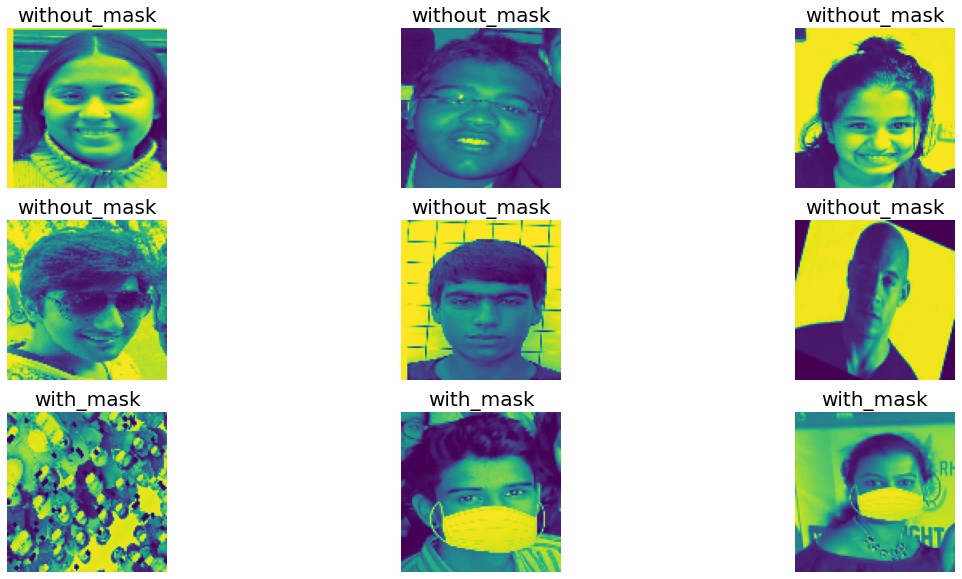

In [4]:
plt.figure(figsize=(20,10))
for i in range(9):
    plt.subplot(330+1+i)
    plt.imshow(data[(i*100)+205])
    plt.title(categories[data_labels[(i*100)+205]],size=20)
    plt.axis('off')
plt.show()

## 4.Data Splitting

Here we use 80% of data for training the model and 20% of model for Validating the model

In [5]:
print("Total Number of Images are:",len(data))
print("Total number of labels are:",len(data_labels))

Total Number of Images are: 1578
Total number of labels are: 1578


In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(data,data_labels,test_size=0.2)

In [7]:
print("Number of Training images are",len(X_train))
print("Number of Testing images are",len(X_test))
print("Number of Training labels are",len(Y_train))
print("Number of Testing labels are",len(Y_test))

Number of Training images are 1262
Number of Testing images are 316
Number of Training labels are 1262
Number of Testing labels are 316


## 5. Converting Images To Numpy Arrays and Reshaping

In [8]:
X_train=np.array(X_train)
X_test=np.array(X_test)
Y_train=np.array(Y_train)
Y_test=np.array(Y_test)

In [9]:
X_train=np.reshape(X_train,(1262,100,100,1))
X_test=np.reshape(X_test,(316,100,100,1))

In [10]:
print("Shape of training images:",X_train.shape)
print("shape of testing images:",X_test.shape)

Shape of training images: (1262, 100, 100, 1)
shape of testing images: (316, 100, 100, 1)


## 6. Normalizing Pixel Values of Images

In [11]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
 
X_train=X_train/255.0
X_test=X_test/255.0

## 7. Converting Labels Into One-Hot Encodings Using to_categorical

In [12]:
from keras.utils import to_categorical

Y_train=tf.keras.utils.to_categorical(Y_train)
Y_test=tf.keras.utils.to_categorical(Y_test)

In [13]:
print("Shape of testing images labels:",Y_test.shape)
print("Shape of training images labels:",Y_train.shape)

Shape of testing images labels: (316, 2)
Shape of training images labels: (1262, 2)


## 8. Defining Neural Network Model

In [14]:
model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=(100,100,1),padding="same",activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(100,(3,3),padding="same",activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dropout(0.5))

model.add(Dense(50,activation='relu'))

model.add(Dense(2, activation='softmax'))

 
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

## 9. Plotting Model 

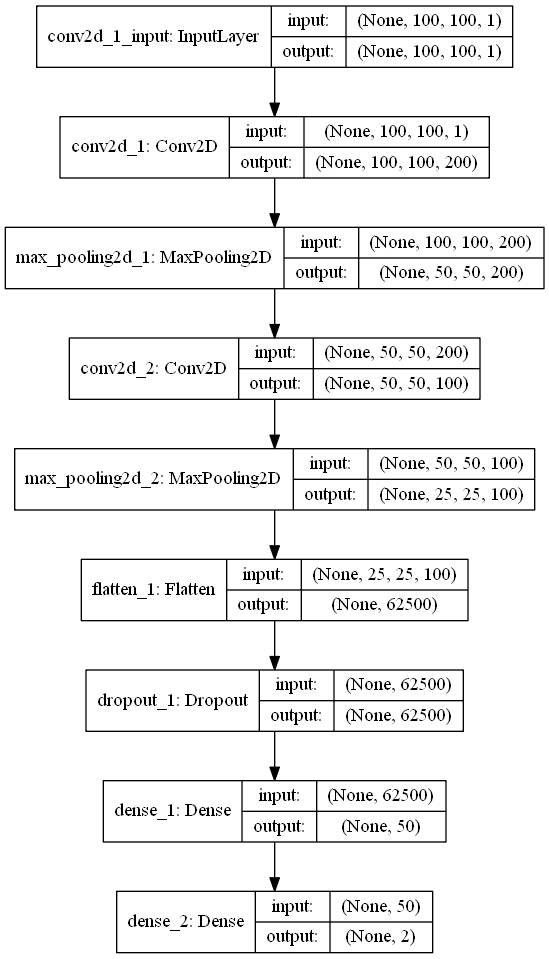

In [15]:
keras.utils.plot_model(model,"Face_Mask_Detection.png",show_shapes=True)

## 10. Model Summary:

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 200)     2000      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 200)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 100)       180100    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 100)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 62500)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 62500)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)               

## 11. Fitting Model With Dataset

In [18]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=20,batch_size=32)

Train on 1262 samples, validate on 316 samples
Epoch 1/20
1262/1262 [==============================] - 240s 190ms/step - loss: 0.4666 - accuracy: 0.7789 - val_loss: 0.4353 - val_accuracy: 0.7911
Epoch 2/20
1262/1262 [==============================] - 228s 180ms/step - loss: 0.3517 - accuracy: 0.8605 - val_loss: 0.3980 - val_accuracy: 0.8259
Epoch 3/20
1262/1262 [==============================] - 226s 179ms/step - loss: 0.2743 - accuracy: 0.8954 - val_loss: 0.3348 - val_accuracy: 0.8766
Epoch 4/20
1262/1262 [==============================] - 217s 172ms/step - loss: 0.2238 - accuracy: 0.9113 - val_loss: 0.3186 - val_accuracy: 0.8956
Epoch 5/20
1262/1262 [==============================] - 216s 171ms/step - loss: 0.1823 - accuracy: 0.9319 - val_loss: 0.4693 - val_accuracy: 0.8006
Epoch 6/20
1262/1262 [==============================] - 224s 178ms/step - loss: 0.1842 - accuracy: 0.9263 - val_loss: 0.3505 - val_accuracy: 0.8671
Epoch 7/20
1262/1262 [==============================] - 214s 170m

## 12. Accuracy Of Model On Test Dataset

In [19]:
_,acc=model.evaluate(X_test,Y_test)
print(acc*100)

316/316 [==============================] - 14s 46ms/step
88.60759735107422


## 13. Save Model

In [20]:
model.save("facemask_40epoch.h5")

## 14. Checking With Some Other Images

WITHOUT MASK


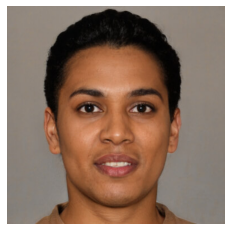

In [48]:
im=Image.open("image2.jpg")
gray_scale=cv2.cvtColor(np.float32(im),cv2.COLOR_BGR2GRAY)
gray=cv2.resize(gray_scale,(100,100))
plt.imshow(im)
plt.axis("off")
im=np.expand_dims(gray,axis=0)
im=np.array(im)
im=np.reshape(im,(1,100,100,1))
pred=model.predict_classes([im])[0]
if pred==0:
    print("WITH MASK")
else:
    print("WITHOUT MASK")

WITH MASK


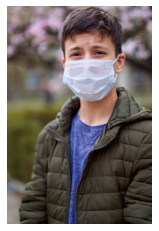

In [47]:
im=Image.open("image1.png")
gray_scale=cv2.cvtColor(np.float32(im),cv2.COLOR_BGR2GRAY)
gray=cv2.resize(gray_scale,(100,100))
plt.imshow(im)
plt.axis("off")
im=np.expand_dims(gray,axis=0)
im=np.array(im)
im=np.reshape(im,(1,100,100,1))
pred=model.predict_classes([im])[0]
if pred==0:
    print("WITH MASK")
else:
    print("WITHOUT MASK")

WITHOUT MASK


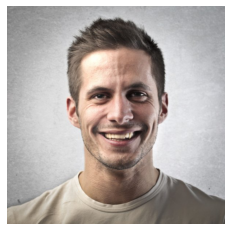

In [45]:
im=Image.open("image3.jpg")
gray_scale=cv2.cvtColor(np.float32(im),cv2.COLOR_BGR2GRAY)
gray=cv2.resize(gray_scale,(100,100))
plt.imshow(im)
plt.axis("off")
im=np.expand_dims(gray,axis=0)
im=np.array(im)
im=np.reshape(im,(1,100,100,1))
pred=model.predict_classes([im])[0]
if pred==0:
    print("WITH MASK")
else:
    print("WITHOUT MASK")

# 15. Acessing Webcam and predicting results
```

1. First load the saved model.
2. With the use of haarcascade_frontalface_default.xml inbuilt classifier present in OpenCV library, create a face classifier.
3. Open your Webcam and capture the frames using a while loop.
4. Create Two dictionaries one to store the labels and the other is to store color of the rectangle frame which will be displayed based on result predicted by the model. If the person is wearing a protective mask, then green rectangle box  with label as MASK will be shown. Similarly if not wearing a protective mask,then red rectangular box with label as "No  Mask" will be shown.
5. Convert colored image that we capture with webcam into a Grayscale image, then reshape and normalize it.
6. Then pass it to the model and predict the result of it.
7. Using np.argmax() along with axis=1 i.e along each row take the maximum value which will be used as label.
8. Display Output accordingly.

```

In [39]:
model = load_model('facemask_40epoch.h5')

face_clsfr=cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')

cam=cv2.VideoCapture(0)

labels_dict={0:'NO MASK',1:'MASK'}
color_dict={0:(0,0,255),1:(0,255,0)}

while(True):

    ret,img=cam.read()
    
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_clsfr.detectMultiScale(gray,1.3,5)  
    for (x,y,w,h) in faces:
    
        face_img=gray[y:y+w,x:x+w]
        
        resized=cv2.resize(face_img,(100,100))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,100,100,1))
        
        result=model.predict(reshaped)

        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        
        cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
        
    cv2.imshow('LIVE',img)
    key=cv2.waitKey(1)
    
    if(key==27):
        break
        
cv2.destroyAllWindows()
cam.release()

## Use of np.argmax() :  returns numpy array

np.argmax returns the index of the maximum value present in the numpy array mentioned as the first argument. axis=1 tells the function to return the index of the maximum value present in every row. 

Here in the code we pass result predicted by the model as first parameter to the argmax() function as index is omly the label.
According to the label we retrieve information from the color_dict and labels_dict library.


## 16. CONCLUSION: 

Therefore a Neural Network model that predicts whether a person is wearing a protective face mask or not with an accuracy of 88.6% is succesfully developed and tested with some new images as well as live webcamera.